# ***Análisis de redes entre las citaciones de la Revista Estadística de Colombia***

In [146]:
# paquete necesario para leer archivos de github
#!pip install requests
#!pip install duckdb
#!pip install matplotlib
#!pip install scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/3a/98/3041681b3a0fef0f59033861a05d846aa1d284b07b531ce35b1b97cc2e93/scipy-1.11.3-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.4 kB 162.5 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.4 kB 245.8 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 291.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.1 MB ? eta -:--:--
   ---------------------------------------- 0.2/44.1 MB 3.9 MB/s eta 0:00:12
    --------------------------------------- 0.6/44.1 MB 6.8 MB/s eta 0:00:07
   - -------------------------------------- 1.8/44.1 MB 10.3 MB/s eta 0:00:05
   -- ------------------------------------- 2.9/44.1 MB 13.4 MB/s eta 0:00:04
   --- -----------------------

In [1]:
import pandas as pd
import requests as rq
import networkx as nx
import pyvis as pv
import sys
import numpy as np
import os
import duckdb
con = duckdb.connect(database=':memory:')
import re # para extraer caracteres que cumplan con una condición en específico
#from io import StringIO
import itertools # análogo a rep en R
import matplotlib.pyplot as plt
import pickle
import copy
import random
import warnings

%matplotlib inline

# ***Creación base relacional de citaciones***

In [41]:
txt = "C:/Users/ASUS/OneDrive/Documentos/Tesis/Analisis-de-redes-de-la-revista-estadistica-Colombiana/TXT"
# se realiza un listado de las decadas disponibles
decadas = os.listdir(txt)
decadas

['2000', '2010', '2020', '60s', '70s', '80s', '90s']

In [42]:
# se crea una lista que contiene una lista por cada década, mostrando las publicaciones que se hicieron en cada década
public = []
# se crea una lista que contiene una lista por cada década, y dentro de cada una de estas se encuentra una lista por publicación en esa década, la cual 
# contiene los nombres de los archivos que contienen
autores_art = []
gen_aut = []
papers = []
pattern = re.compile(r'\((.*?)\)')
for i in range(len(decadas[3:7])):
    papers.append([])
    autores_art.append([])
    gen_aut.append([])
    txt1 = txt+"/"+decadas[3:7][i]
    publ = os.listdir(txt1)
    public.append(publ)
    for j in range(len(publ)):
        papers[i].append([]) # se crea una lista vacia para cada publicación
        autores_art[i].append([])
        gen_aut[i].append([])
        txt2 = txt1+"/"+publ[j]
        art = os.listdir(txt2) # listado de archivos en la respectiva publicación
        for k in range(len(art)):
            # separar nombres de autores
            public_split = art[k].split('_',2)
            aut = public_split[0].split(',')
            gen_aut[i][j].append(pattern.findall(public_split[0]))
            autores_art[i][j].append([nombre.replace("(M)","").replace("(F)","") for nombre in aut])

            # separar cada línea del txt en un elemento de una lista
            art_txt = open(txt2+"/"+art[k], 'r', encoding='utf-8', errors='replace').readlines()
            art_txt = [linea.strip() for linea in art_txt]
            papers[i][j].append(art_txt)     

In [43]:
def which_ref(lista):
    for i, x in enumerate(lista):
        if str.title(str.lower(x)) in ['Referencias','Bibliografía','Bibliografia','References','Bibliography','Referências']:
            return i  # Retorna la posición del primer elemento que cumple la condición
    return 'No se encontró'

autores_ref = []
titulo_ref = []
año_ref = []
titulo_art = []
for dec in papers:
    autores_ref.append([])
    titulo_ref.append([])
    titulo_art.append([])
    año_ref.append([])
    for pub in dec:
        autores_ref[papers.index(dec)].append([])
        titulo_ref[papers.index(dec)].append([])
        titulo_art[papers.index(dec)].append([])
        año_ref[papers.index(dec)].append([])
        for art in pub:
            titulo_art[papers.index(dec)][dec.index(pub)].append(str.title(str.lower(art[0])))
            
            pos_ref = which_ref(art)
            autores_ref[papers.index(dec)][dec.index(pub)].append([])
            titulo_ref[papers.index(dec)][dec.index(pub)].append([])
            año_ref[papers.index(dec)][dec.index(pub)].append([])
            if pos_ref=='No se encontró':
                print([papers.index(dec),dec.index(pub),pub.index(art)])
            else:
                print([papers.index(dec),dec.index(pub),pub.index(art)])
                for ref in art[pos_ref+1:]:
                    part = ref.split('.')
                    autores_ref[papers.index(dec)][dec.index(pub)][pub.index(art)].append(part[0].split(','))
                    titulo_ref[papers.index(dec)][dec.index(pub)][pub.index(art)].append(str.title(str.lower(part[1])))
                    año_ref[papers.index(dec)][dec.index(pub)][pub.index(art)].append(part[2].strip('(').strip(')'))

[0, 0, 0]
[0, 0, 1]
[0, 1, 0]
[1, 0, 0]
[1, 0, 1]
[1, 0, 2]
[1, 0, 3]
[2, 0, 0]
[2, 0, 1]
[2, 0, 2]
[2, 0, 3]
[2, 0, 4]
[2, 0, 5]
[2, 0, 6]
[2, 1, 0]
[2, 1, 1]
[2, 1, 2]
[2, 1, 3]
[2, 1, 4]
[2, 1, 5]
[2, 1, 6]
[2, 2, 0]
[2, 2, 1]
[2, 2, 2]
[2, 2, 3]
[2, 2, 4]
[2, 2, 5]
[2, 3, 0]
[2, 3, 1]
[2, 3, 2]
[2, 3, 3]
[2, 3, 4]
[2, 3, 5]
[2, 4, 0]
[2, 4, 1]
[2, 4, 2]
[2, 4, 3]
[2, 4, 4]
[2, 4, 5]
[2, 4, 6]
[2, 4, 7]
[2, 4, 8]
[2, 4, 9]
[2, 4, 10]
[2, 4, 11]
[2, 4, 12]
[2, 4, 13]
[2, 4, 14]
[2, 4, 15]
[2, 4, 16]
[2, 4, 17]
[2, 4, 18]
[2, 4, 19]
[2, 5, 0]
[2, 5, 1]
[2, 5, 2]
[2, 5, 3]
[2, 5, 4]
[2, 6, 0]
[2, 6, 1]
[2, 6, 2]
[2, 6, 3]
[2, 6, 4]
[2, 6, 5]
[2, 6, 6]
[2, 7, 0]
[2, 7, 1]
[2, 7, 2]
[2, 7, 3]
[2, 7, 4]
[2, 7, 5]
[2, 8, 0]
[2, 8, 1]
[2, 9, 0]
[2, 9, 1]
[2, 9, 2]
[2, 10, 0]
[2, 10, 1]
[2, 10, 2]
[2, 11, 0]
[2, 11, 1]
[2, 11, 2]
[2, 12, 0]
[2, 12, 1]
[2, 12, 2]
[2, 13, 0]
[2, 13, 1]
[2, 14, 0]
[2, 14, 1]
[2, 14, 2]
[2, 14, 3]
[2, 14, 4]
[2, 15, 0]
[2, 15, 1]
[2, 15, 2]
[2, 15, 3]
[2, 15, 4]

In [44]:
# Función para aplanar listas 
def flatten_list(nested_list):
    flat_list = []
    for element in nested_list:
        if isinstance(element, list):
            flat_list.extend(flatten_list(element))
        else:
            flat_list.append(element)
    return flat_list

decadas = decadas[3:7]

In [45]:
Info = pd.DataFrame(columns=['Autor_Art','Autor_Ref','Gen_Autor_Art','Titulo_Art','Titulo_Ref','Decada','Año_Art','Año_Ref'])

for dec in autores_art:
    i = autores_art.index(dec)
    for sem in dec:
        j = dec.index(sem)
        for art in sem:
            k = sem.index(art)
            num_ref = len(autores_ref[i][j][k])
            for aut in art:
                w = art.index(aut)
                for x in range(num_ref):
                    num_aut_ref = len(autores_ref[i][j][k][x])
                    new_ref = pd.DataFrame({'Autor_Art':list(itertools.repeat(autores_art[i][j][k][w], times=num_aut_ref)),
                                            'Autor_Ref':autores_ref[i][j][k][x],
                                            'Gen_Autor_Art':list(itertools.repeat(gen_aut[i][j][k][w], times=num_aut_ref)),
                                            'Titulo_Art':list(itertools.repeat(titulo_art[i][j][k], times=num_aut_ref)),
                                            'Titulo_Ref':list(itertools.repeat(titulo_ref[i][j][k][x], times=num_aut_ref)),
                                            'Decada':list(itertools.repeat(decadas[i], times=num_aut_ref)),
                                            'Año_Art':list(itertools.repeat(public[i][j][:4], times=num_aut_ref)),
                                            'Año_Ref':list(itertools.repeat(año_ref[i][j][k][x], times=num_aut_ref))})
                    Info = pd.concat([Info,new_ref], ignore_index=True)

In [46]:
len(autores_art)

4

In [47]:
for i in range(len(Info['Autor_Art'])):
    x = Info['Autor_Art'].iloc[i].lstrip()
    if '( )' in x:
        x =  x.replace('( )', '')
    Info['Autor_Art'].iloc[i] = x

Info = con.execute("""select case when Autor_Art = 'J A Vargas N'  then 'Vargas J A'
                                  when Autor_Art in ('D Ospina Botero','D Ospina') then 'Ospina D'
                                  when Autor_Art = 'F Cepeda C' then 'Cepeda C F'
                                  when Autor_Art in ('L Bautista','L Bautista S') then 'Bautista L'
                                  when Autor_Art = 'M Fidel Castillo' then 'Castillo M F'
                                  when Autor_Art = 'H Sahai' then 'Sahai H'
                                  when Autor_Art = 'M F Castillo' then 'Castillo M F'
                                  when Autor_Art = 'C Quintero' then 'C Quintero Guzman'
                                  when Autor_Art = 'B Chaves Cordoba' then 'B Chavez Cordoba'
                                  when Autor_Art = 'R A Matos Moreno' then 'R A Matos M'
                                  when Autor_Art = 'J Poltronieri' then 'Poltronieri J'
                                  when Autor_Art = 'C Coral' then 'Coral Gómez C'
                                  when Autor_Art = 'A Nikolaivich Kolmogorov' then 'A N Kolmogorov'
                                  when Autor_Art = 'E Castaño Velez' then 'E Castaño V'
                                  when Autor_Art = 'G Beltran' then 'M G Beltran Montero'
                                  when Autor_Art = 'I Rodriguez' then 'I Rodriguez G'
                                  when Autor_Art = 'A Velasco Muñoz' then 'A Velasco M'
                                  when Autor_Art = 'J Clavijo M' then 'J A Clavijo M'
                                  when Autor_Art = 'V H Prieto Bernal' then 'V H Prieto'
                                  when Autor_Art = 'I Rodriguez' then 'I Rodriguez G'
                                  when Autor_Art in ('R Fandiño','R E Fandiño A') then 'Fandiño A R'
                                  when Autor_Art in ('F Nieto','F H Nieto S') then 'F H Nieto'
                                  when Autor_Art in ('J A Blanco B','J A Blanco Barros') then 'Blanco B J A'
                                  when Autor_Art in ('J A Corzo S','J Corzo S') then 'Corzo J'
                                  when Autor_Art in ('P N Pacheco','P N Pacheco O','P N Pacheco Duran') then 'P N Pacheco D'
                                  when Autor_Art in ('L A Lopez Perez','L A Lopez') then 'L A Lopez P'
                                  when Autor_Art in ('L A Lopez Perez','L A Lopez') then 'L A Lopez P'
                                  else Autor_Art 
                             end as Autor_Art ,
                             case when Autor_Ref in ('Fandiño R','Fandiño A') then 'Fandiño A R'
                                  when Autor_Ref in ('Kolmogorov A N','Kolmogorov','A Kolmogorov') then 'A N Kolmogorov'
                                  when Autor_Ref in ('MAYORGA J Humberto','Mayorga J H') then 'J H Mayorga A'
                                  when Autor_Ref in ('YAÑEZ C SERGIO','YAÑEZ S') then 'S Yañez Canal'
                                  when Autor_Ref in ('BLANCO L','Blanco L') then 'L Blanco Castañeda'
                                  when Autor_Ref in ('Nieto F H','Nieto F') then 'F H Nieto'
                                  when Autor_Ref = 'Blanco B' then 'Blanco B J A'
                                  when Autor_Ref = 'Ramos J' then 'J Ramos'
                                  when Autor_Ref = 'Gil D' then 'D S Gil G'
                                  when Autor_Ref = 'Granados D' then 'A Granados Diaz'
                                  when Autor_Ref = 'Castaño E' then 'E Castaño V'
                                  when Autor_Ref = 'Torres H' then 'H Torres'
                                  when Autor_Ref = 'O Castaño' then 'Castaño O'
                                  when Autor_Ref = 'Muñoz de Ozak M' then 'M Muñoz de Ozak'
                                  when Autor_Ref = 'Fajardo S' then 'S Fajardo'
                                  when Autor_Ref = 'Arora Manmohan S' then 'M S Arora'
                                  when Autor_Ref = 'Cepeda W E' then 'W E Cepeda Peña'
                                  when Autor_Ref = 'Madan K C' then 'K C Madan'
                                  when Autor_Ref = 'Vasco C E' then 'C E Vasco Uribe'
                                  when Autor_Ref = 'Clavijo J A' then 'J A Clavijo M'
                                  when Autor_Ref = 'Barbary O' then 'O Barbary'
                                  when Autor_Ref = 'Bouza C' then 'C Bouza'
                                  when Autor_Ref = 'Correa J C' then 'J C Correa Morales'
                                  else Autor_Ref 
                             end as Autor_Ref, 
                             Gen_Autor_Art, Titulo_Art,                                  
                             case when Titulo_Ref = 'Una Prueba De Dispersión Basada En Secuencias' then 'Pruebas De Hipótesis Sobre Parámetros De Localización Y Dispersión Basadas En Secuencias'
                                  else Titulo_Ref 
                             end as Titulo_Ref,
                             Decada, Año_Art, Año_Ref
                         from Info""").df()

In [48]:
Info.tail()

Autor_Art           Autor_Ref Gen_Autor_Art  \
2552  J C Correa Morales            Ozturk A             M   
2553  J C Correa Morales         Small N J H             M   
2554  J C Correa Morales      Srivastava M S             M   
2555  J C Correa Morales             Yáñez S             M   
2556  J C Correa Morales  J C Correa Morales             M   

                                             Titulo_Art  \
2552  Una Revisión De Medidas Multivariadas De Asime...   
2553  Una Revisión De Medidas Multivariadas De Asime...   
2554  Una Revisión De Medidas Multivariadas De Asime...   
2555  Una Revisión De Medidas Multivariadas De Asime...   
2556  Una Revisión De Medidas Multivariadas De Asime...   

                                             Titulo_Ref Decada Año_Art Año_Ref  
2552  A Comparative Study Of Goodness Of Fit Teats F...    90s    1999    1993  
2553  Marginal Skewness And Kurtosis In Testing Mult...    90s    1999    1980  
2554  A Measure Of Skewness And Kurtosis And A Graph...    90s    1999    1984  
2555  Reporte Técnico: Estudio De Potencia Des Estad...    90s    1999    1997  
2556  Reporte Técnico: Estudio De Potencia Des Estad...    90s    1999    1997

In [49]:
Rel_Aut = con.execute("""select Autor_Art, Autor_Ref, Decada, count(*) as Num_Ref
                      from Info
                      group by Autor_Art, Autor_Ref, Decada""").df()

Rel_Aut

Autor_Art                 Autor_Ref Decada  Num_Ref
0           L Thorin Casas                    A Anos    60s        1
1           L Thorin Casas            Diaz de Arcaya    60s        1
2           L Thorin Casas              Lucien March    60s        1
3            I Rodriguez G              D S Johnscon    80s        1
4            I Rodriguez G                   Neter J    80s        1
...                    ...                       ...    ...      ...
2182    J C Correa Morales                  Kent J T    90s        2
2183     H Chacon Gonzalez              Benzecri J P    90s        1
2184               A Perez                 Box G E P    90s        1
2185        C Panza Ospino  Peña Sánchez de Rivera D    90s        1
2186  M C Jaramillo Elorza                Looney S W    90s        2

[2187 rows x 4 columns]

In [50]:
Rel_Aut['Num_Ref'].max()

8

# ***Redes de citaciones entre autores***

In [51]:
G_60 = nx.DiGraph()
G_70 = nx.DiGraph()
G_80 = nx.DiGraph()
G_90 = nx.DiGraph()

for index, row in Rel_Aut[Rel_Aut['Decada']=='60s'].iterrows():
    G_60.add_edge(row['Autor_Art'], row['Autor_Ref'], weight=row['Num_Ref'])

for index, row in Rel_Aut[Rel_Aut['Decada']=='70s'].iterrows():
    G_70.add_edge(row['Autor_Art'], row['Autor_Ref'], weight=row['Num_Ref'])

for index, row in Rel_Aut[Rel_Aut['Decada']=='80s'].iterrows():
    G_80.add_edge(row['Autor_Art'], row['Autor_Ref'], weight=row['Num_Ref'])

for index, row in Rel_Aut[Rel_Aut['Decada']=='90s'].iterrows():
    G_90.add_edge(row['Autor_Art'], row['Autor_Ref'], weight=row['Num_Ref'])

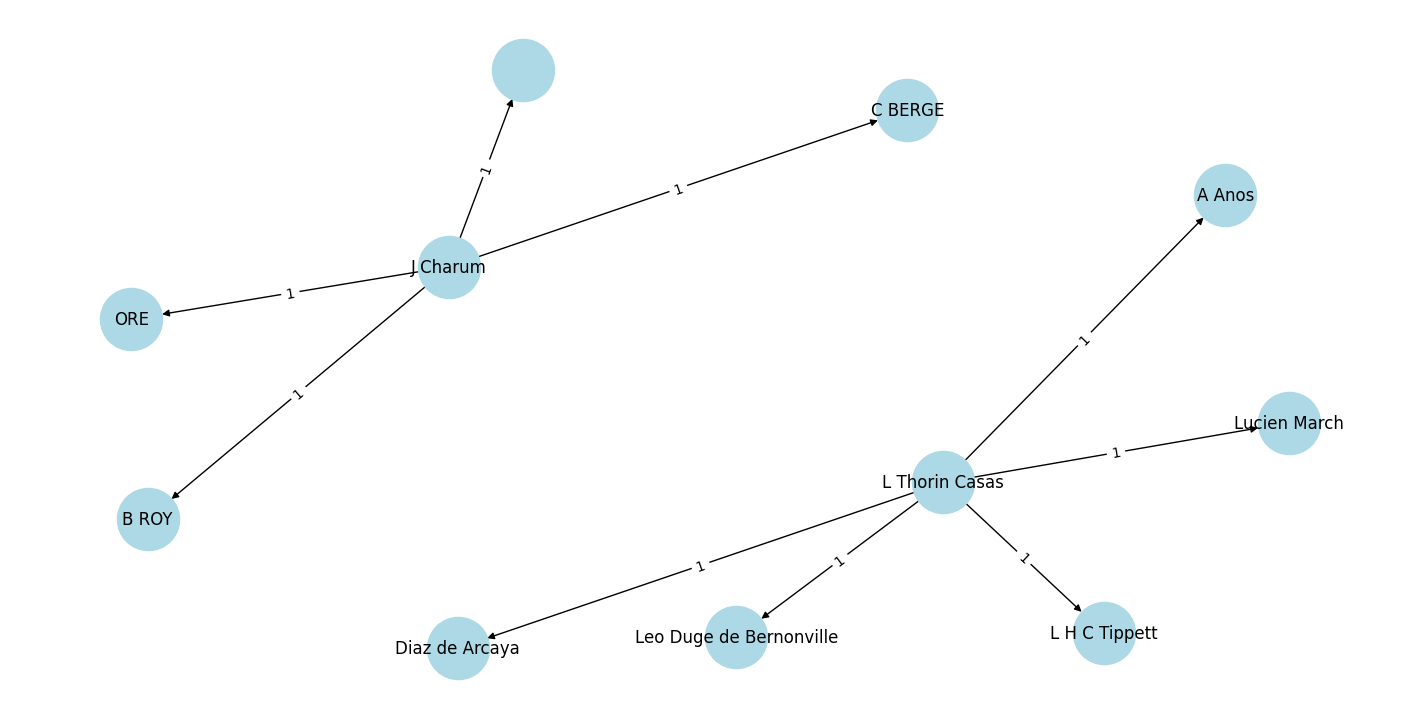

In [63]:
plt.figure(figsize=(14,7))

# Dibujar el grafo
pos = nx.spring_layout(G_60)
nx.draw(G_60, pos, with_labels=True, node_color='lightblue', node_size=2000)
labels = nx.get_edge_attributes(G_60, 'weight')
nx.draw_networkx_edge_labels(G_60, pos, edge_labels=labels)

# Mostrar el grafo
plt.show()

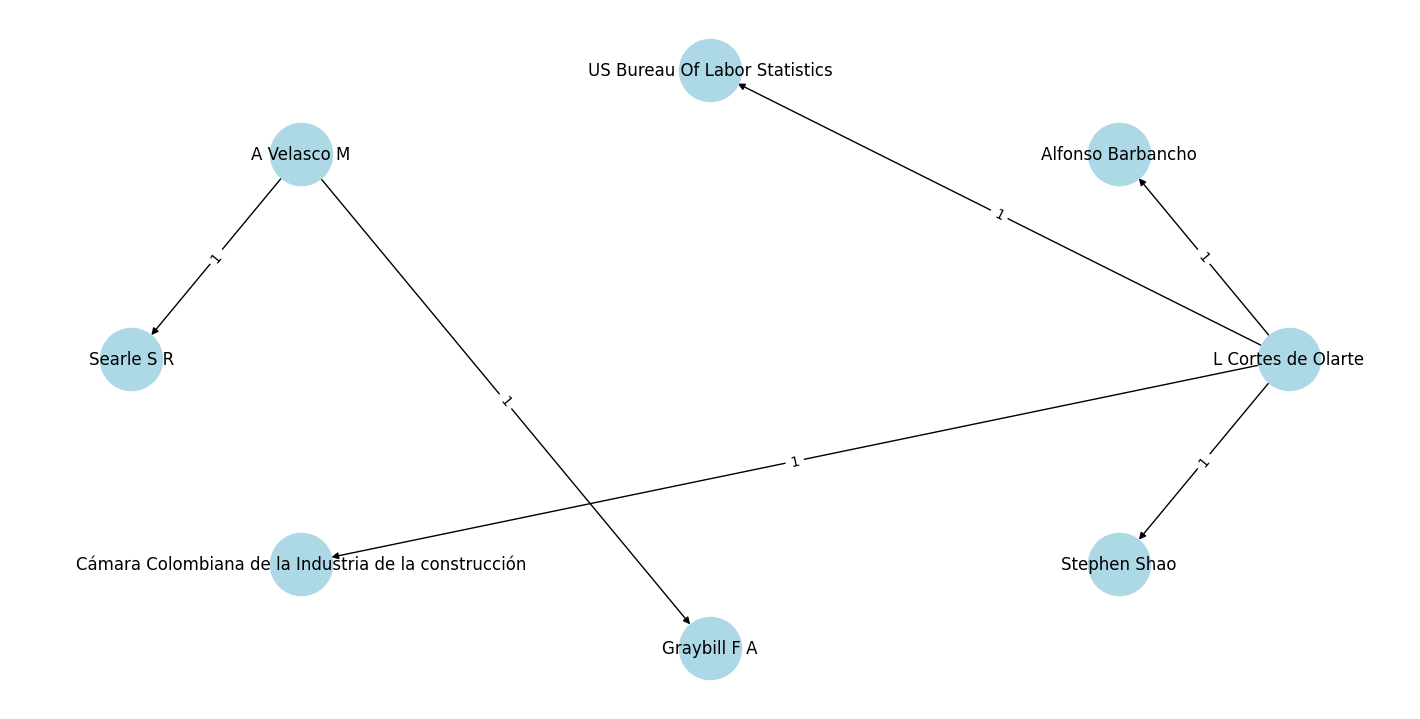

In [68]:
plt.figure(figsize=(14,7))

# Dibujar el grafo
pos = nx.circular_layout(G_70)
nx.draw(G_70, pos, with_labels=True, node_color='lightblue', node_size=2000)
labels = nx.get_edge_attributes(G_70, 'weight')
nx.draw_networkx_edge_labels(G_70, pos, edge_labels=labels)

# Mostrar el grafo
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32536\1259482693.py:12: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G_80, pos, edgelist=[(u, v)], alpha=alpha)


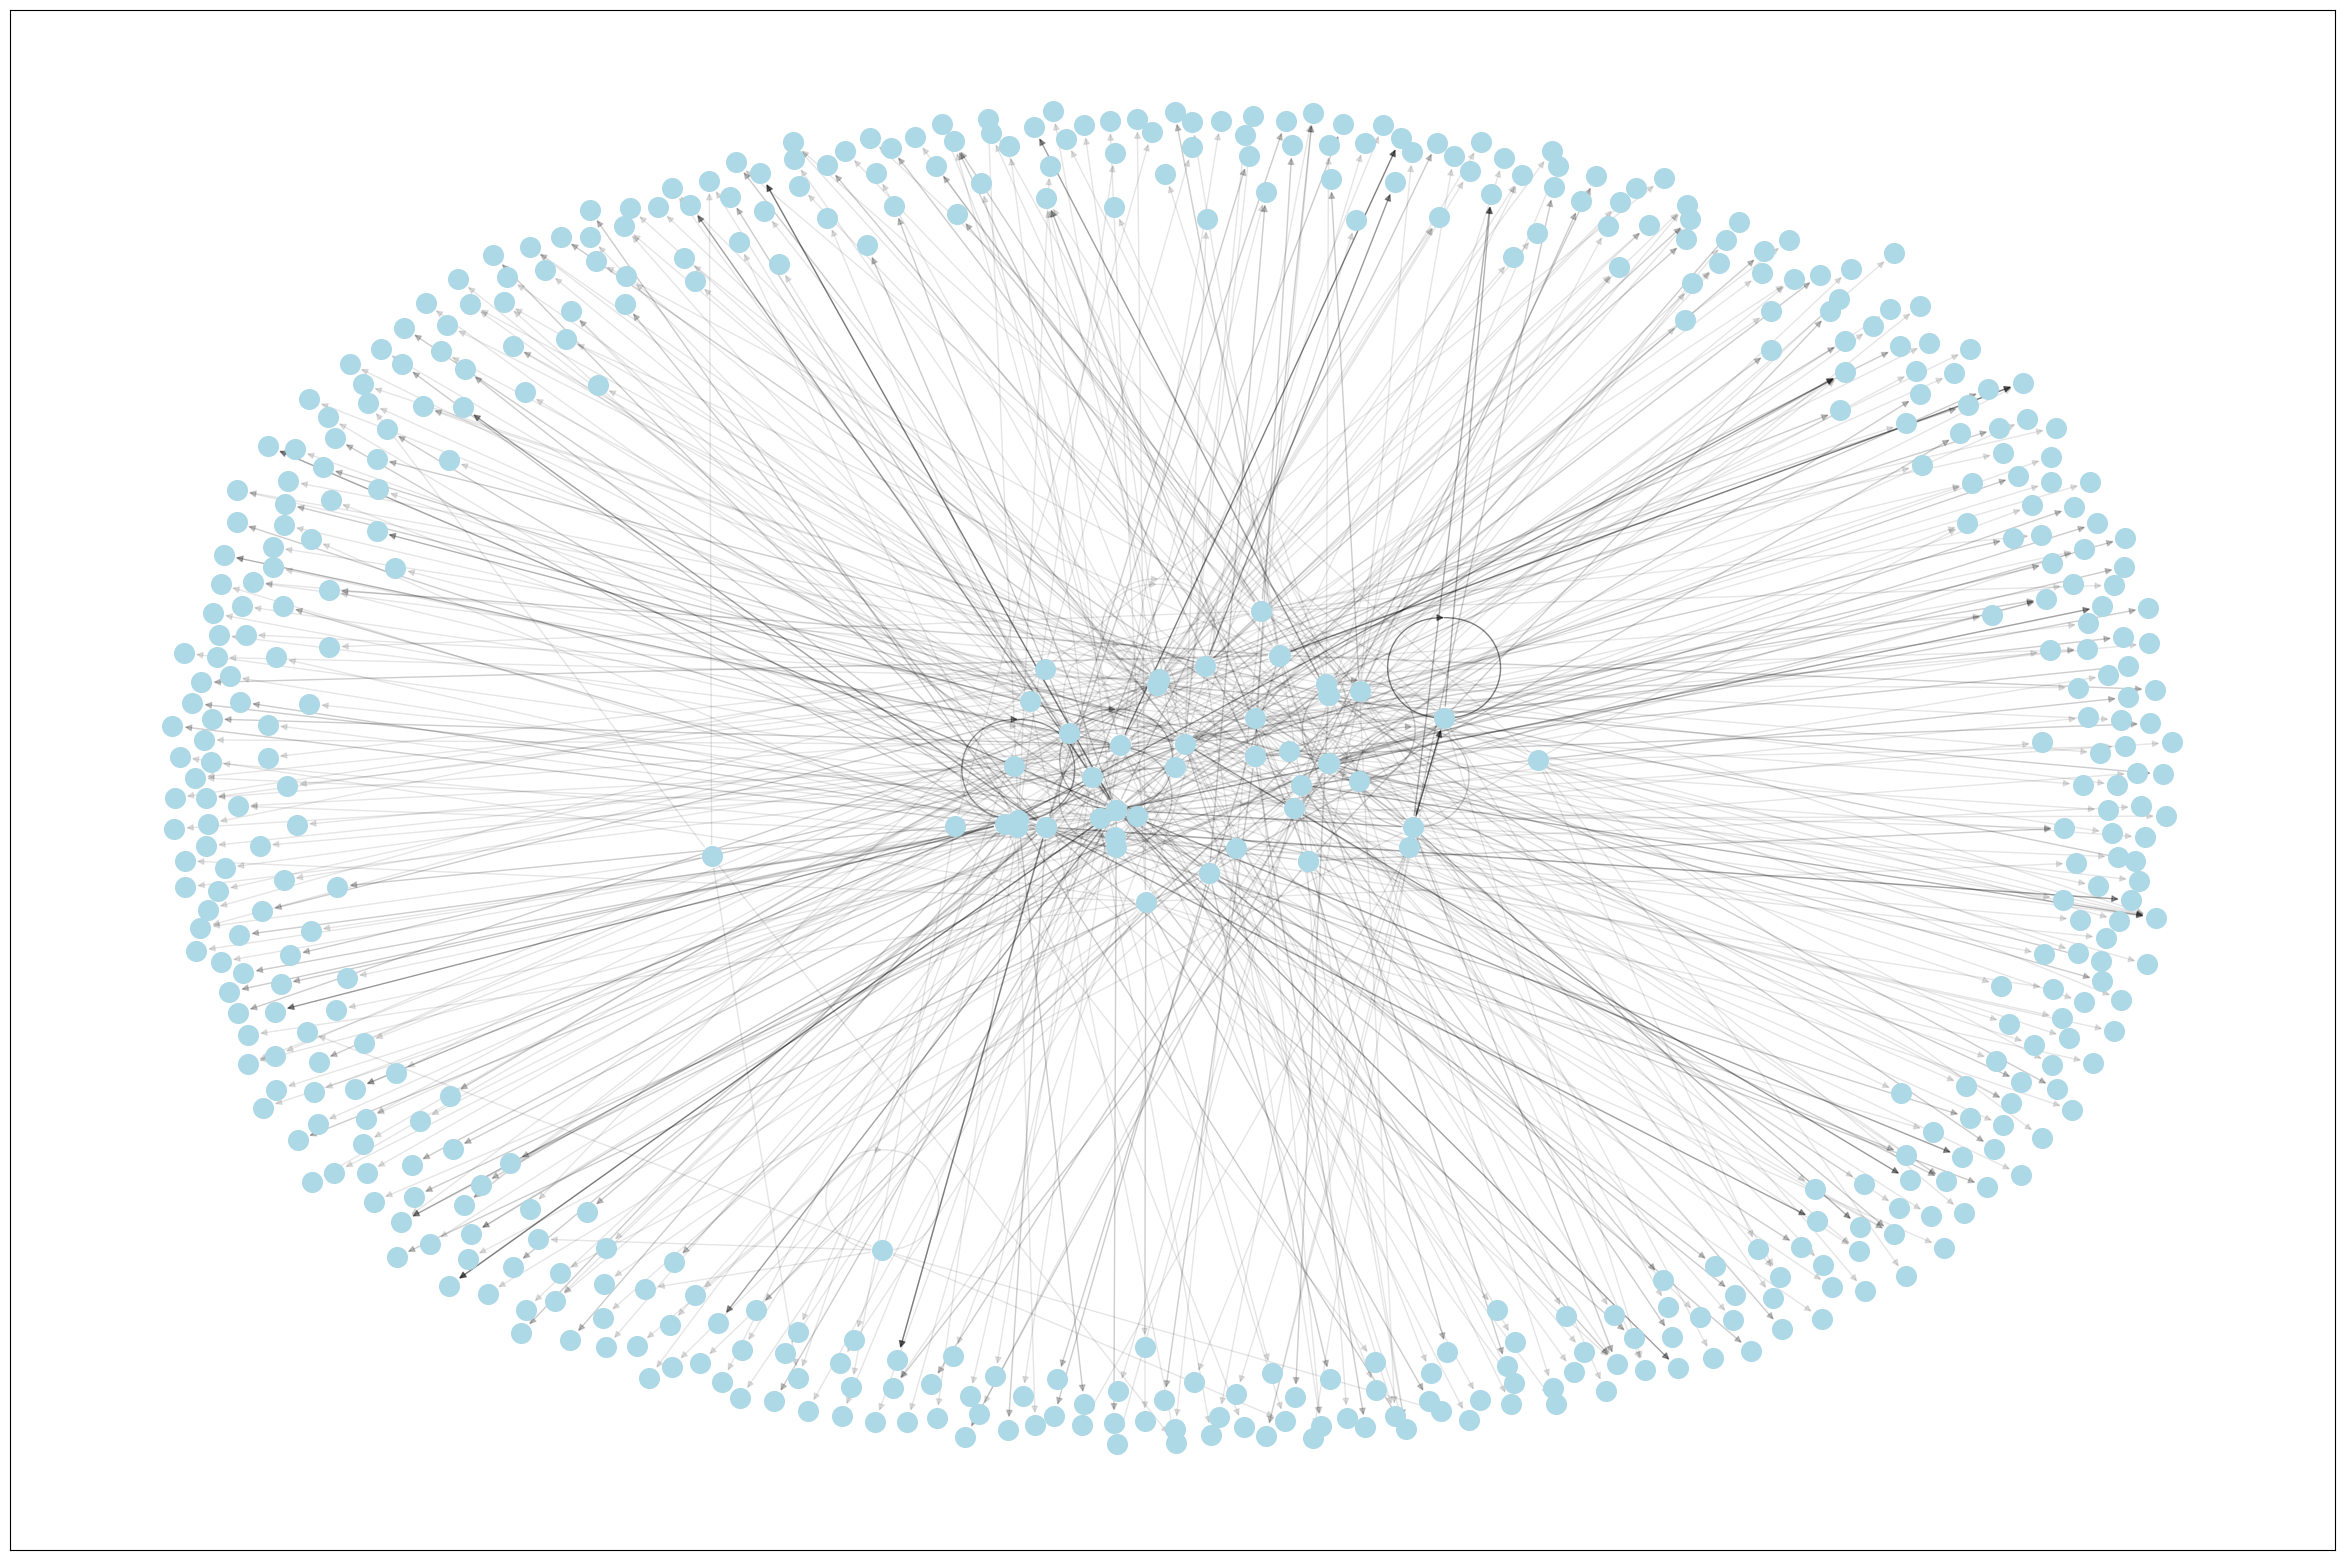

In [111]:
plt.figure(figsize=(30,20))

w_max = max([data['weight'] for u, v, data in G_80.edges(data=True) if 'weight' in data])

# Dibujar el grafo
pos = nx.spring_layout(G_80)
nx.draw_networkx_nodes(G_80, pos, node_color='lightblue', node_size=200)

for u, v, d in G_80.edges(data=True):
    # del diccionario de atributos se coge el valor del atributo weight, en caso de no tener atributo por defecto usa el valor 0
    alpha = d.get('weight', 0) * 0.5 /w_max 
    nx.draw_networkx_edges(G_80, pos, edgelist=[(u, v)], alpha=alpha)

# Mostrar el grafo
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32536\2071499721.py:12: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G_90, pos, edgelist=[(u, v)], alpha=alpha)


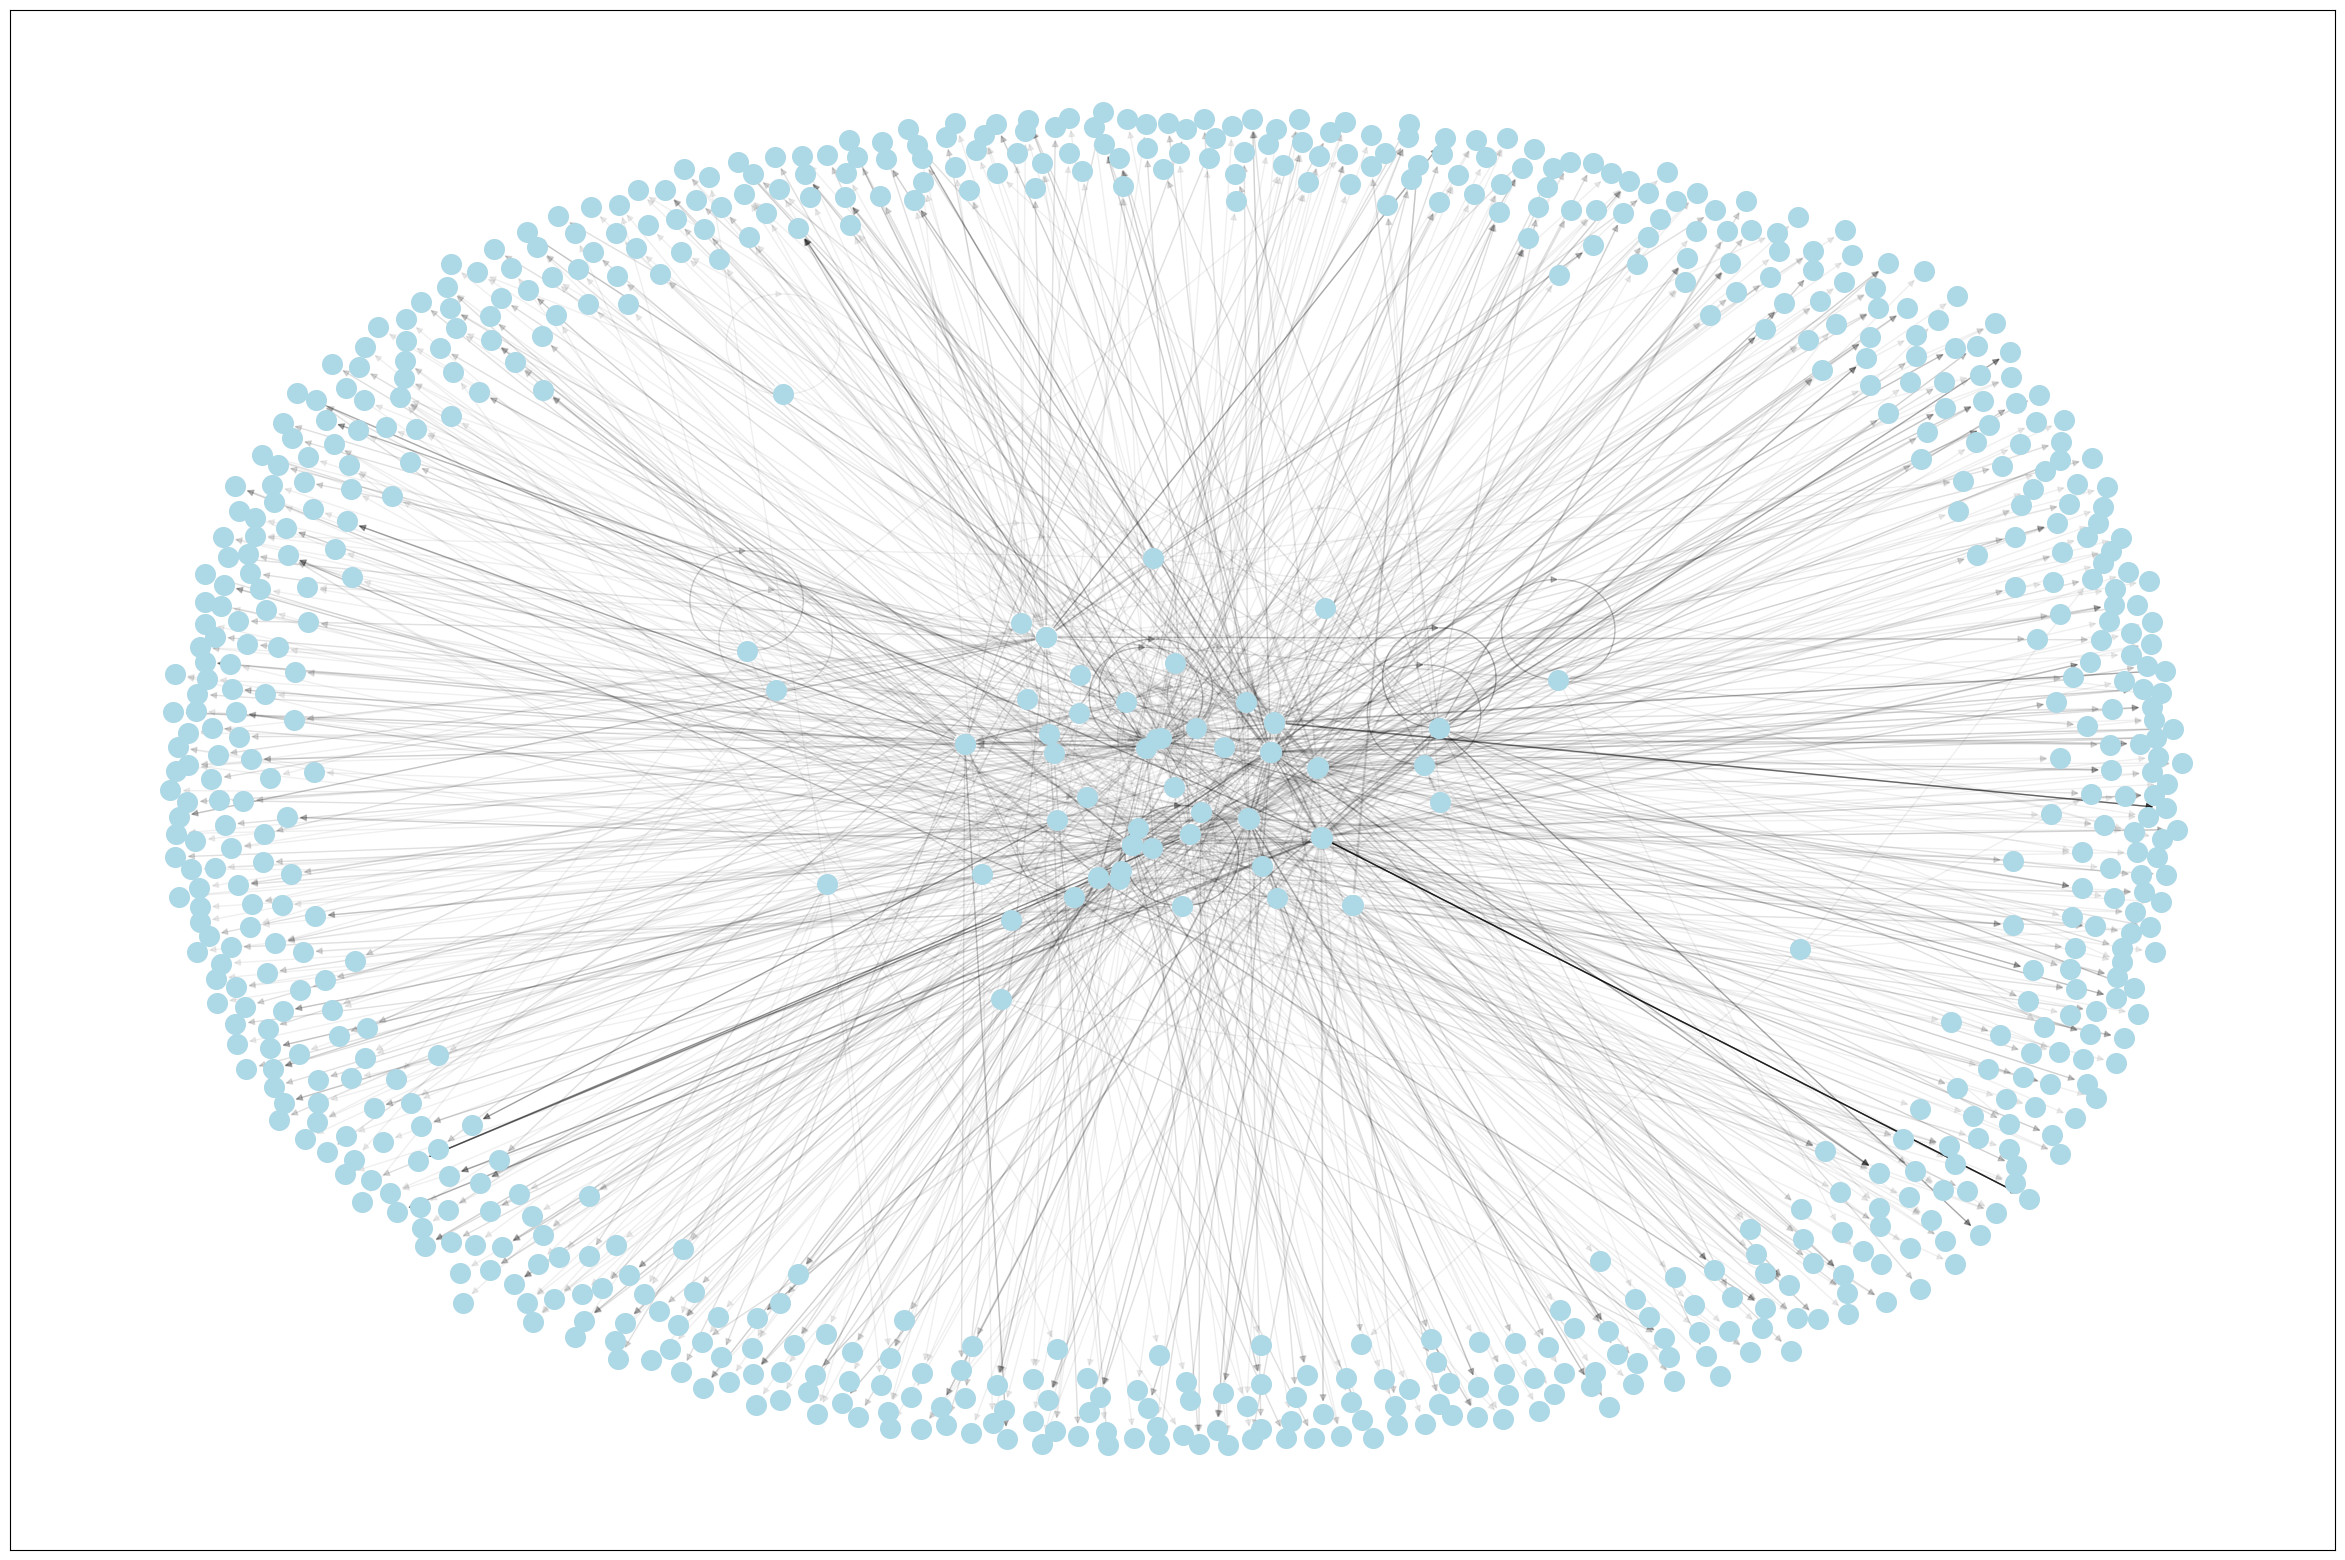

In [114]:
plt.figure(figsize=(30,20))

w_max = max([data['weight'] for u, v, data in G_90.edges(data=True) if 'weight' in data])

# Dibujar el grafo
pos = nx.spring_layout(G_90)
nx.draw_networkx_nodes(G_90, pos, node_color='lightblue', node_size=200)

for u, v, d in G_90.edges(data=True):
    # del diccionario de atributos se coge el valor del atributo weight, en caso de no tener atributo por defecto usa el valor 0
    alpha = d.get('weight', 0) * 0.5 /w_max 
    nx.draw_networkx_edges(G_90, pos, edgelist=[(u, v)], alpha=alpha)

# Mostrar el grafo
plt.show()

## ***Medidas descriptivas de las redes***

In [136]:
Grafos_Aut = [G_60,G_70,G_80,G_90]

Med_Descr = pd.DataFrame(['Num. Nodos','Num. Aristas','Grado In Prom.','Grado Out Prom.','Densidad','Transitividad','Reciprocidad'], columns=['Medida'])

for grafo in Grafos_Aut:
    i = Grafos_Aut.index(grafo)
    grado_in = np.mean([degree for node, degree in grafo.in_degree(weight='weight')])
    grado_out = np.mean([degree for node, degree in grafo.out_degree(weight='weight')])

    med = pd.DataFrame({decadas[i]:[grafo.number_of_nodes(),grafo.number_of_edges(),grado_in,grado_out,
                              nx.density(grafo),nx.transitivity(grafo),nx.reciprocity(grafo)]})
    
    Med_Descr = pd.concat([Med_Descr,med], ignore_index=False, axis=1)

Med_Descr

Medida        60s       70s         80s          90s
0       Num. Nodos  11.000000  8.000000  544.000000   775.000000
1     Num. Aristas   9.000000  6.000000  708.000000  1464.000000
2   Grado In Prom.   0.818182  0.750000    1.544118     2.196129
3  Grado Out Prom.   0.818182  0.750000    1.544118     2.196129
4         Densidad   0.081818  0.107143    0.002397     0.002441
5    Transitividad   0.000000  0.000000    0.004630     0.005844
6     Reciprocidad   0.000000  0.000000    0.002825     0.001366

In [ ]:
nx.in_degree_centrality(grafo),nx.out_degree_centrality(grafo),nx.closeness_centrality(grafo, distance='weight'),
                              nx.betweenness_centrality(G, normalized=True, weight='weight'),nx.eigenvector_centrality_numpy(grafo)

# ***Redes de citaciones entre artículos***

In [163]:
G_60_art = nx.DiGraph()
G_70_art = nx.DiGraph()
G_80_art = nx.DiGraph()
G_90_art = nx.DiGraph()

for index, row in Info[Info['Decada']=='60s'].iterrows():
    G_60_art.add_edge(row['Titulo_Art'], row['Titulo_Ref'])

for index, row in Info[Info['Decada']=='70s'].iterrows():
    G_70_art.add_edge(row['Autor_Art'], row['Autor_Ref'])

for index, row in Info[Info['Decada']=='80s'].iterrows():
    G_80_art.add_edge(row['Autor_Art'], row['Autor_Ref'])

for index, row in Info[Info['Decada']=='90s'].iterrows():
    G_90_art.add_edge(row['Autor_Art'], row['Autor_Ref'])

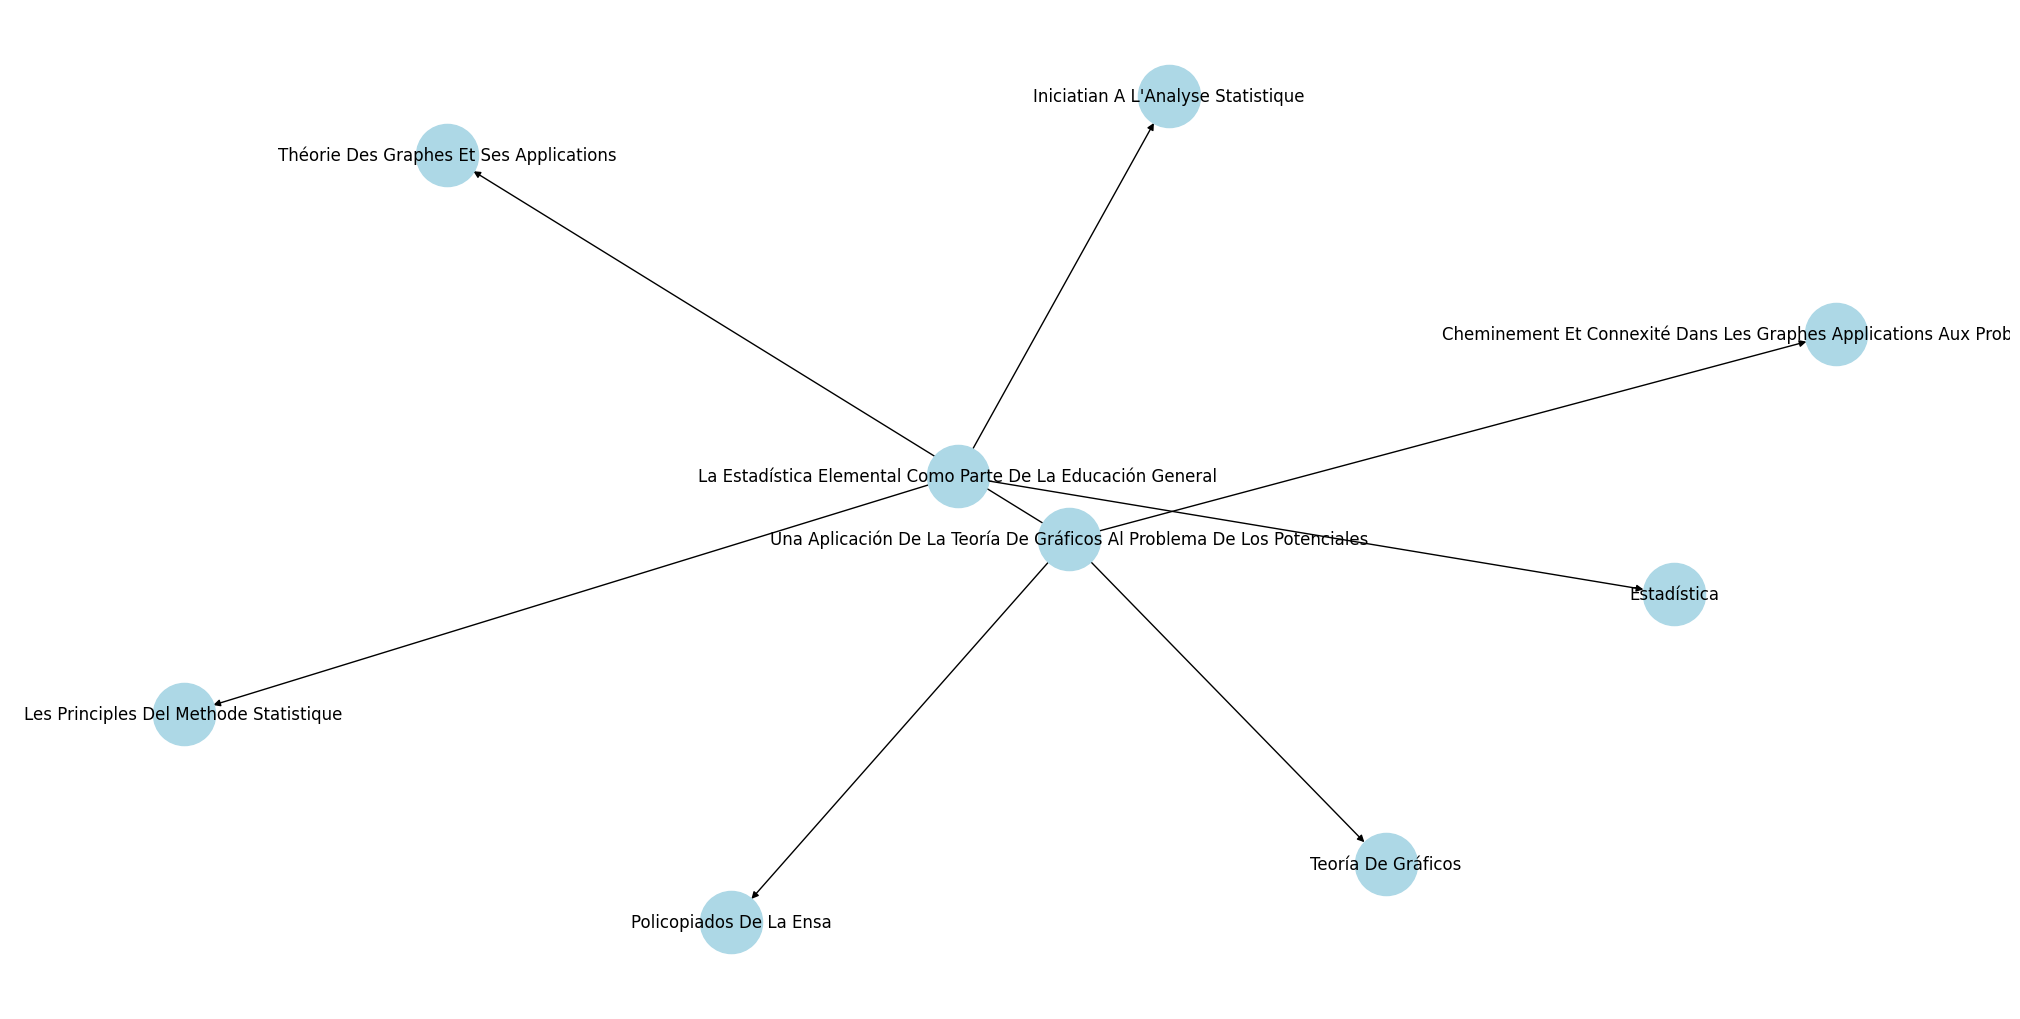

In [166]:
plt.figure(figsize=(20,10))

# Dibujar el grafo
pos = nx.spring_layout(G_60_art)
nx.draw(G_60_art, pos, with_labels=True, node_color='lightblue', node_size=2000)

# Mostrar el grafo
plt.show()

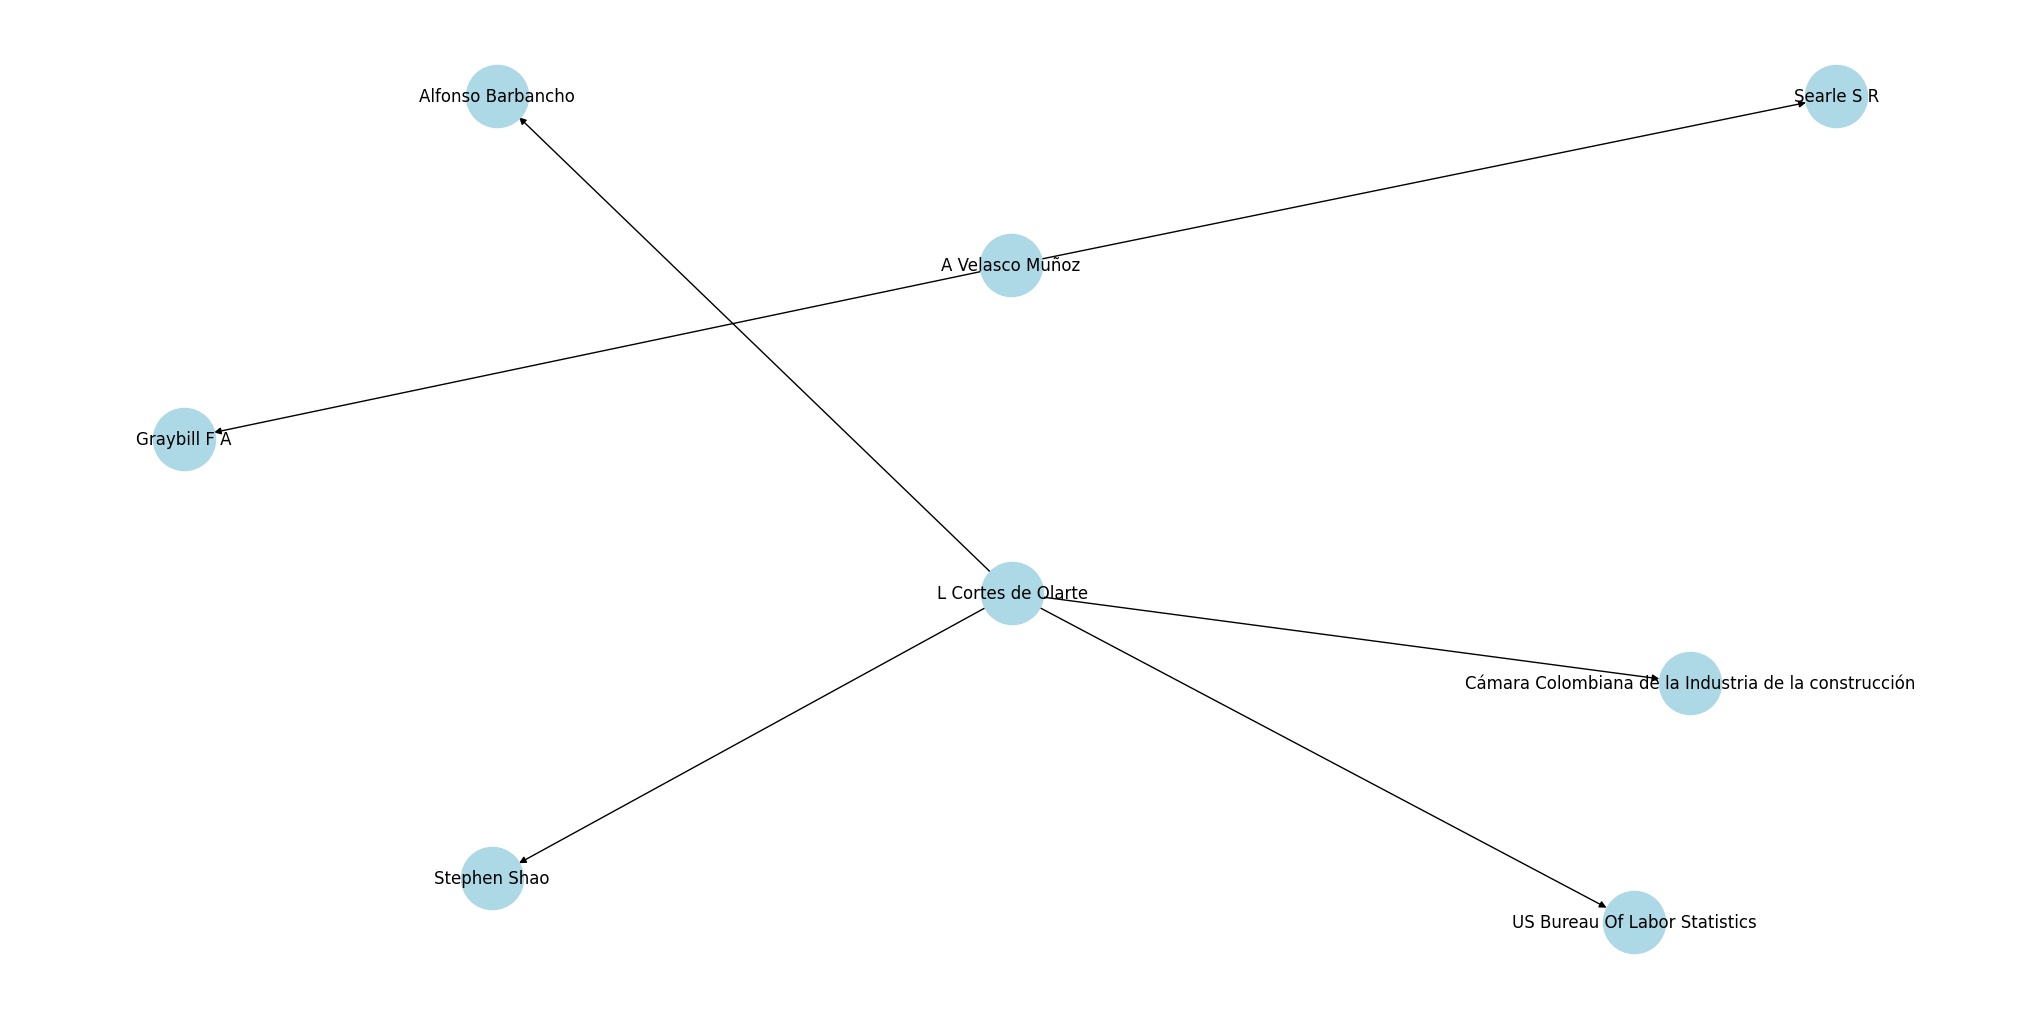

In [167]:
plt.figure(figsize=(20,10))

# Dibujar el grafo
pos = nx.spring_layout(G_70_art)
nx.draw(G_70_art, pos, with_labels=True, node_color='lightblue', node_size=2000)

# Mostrar el grafo
plt.show()

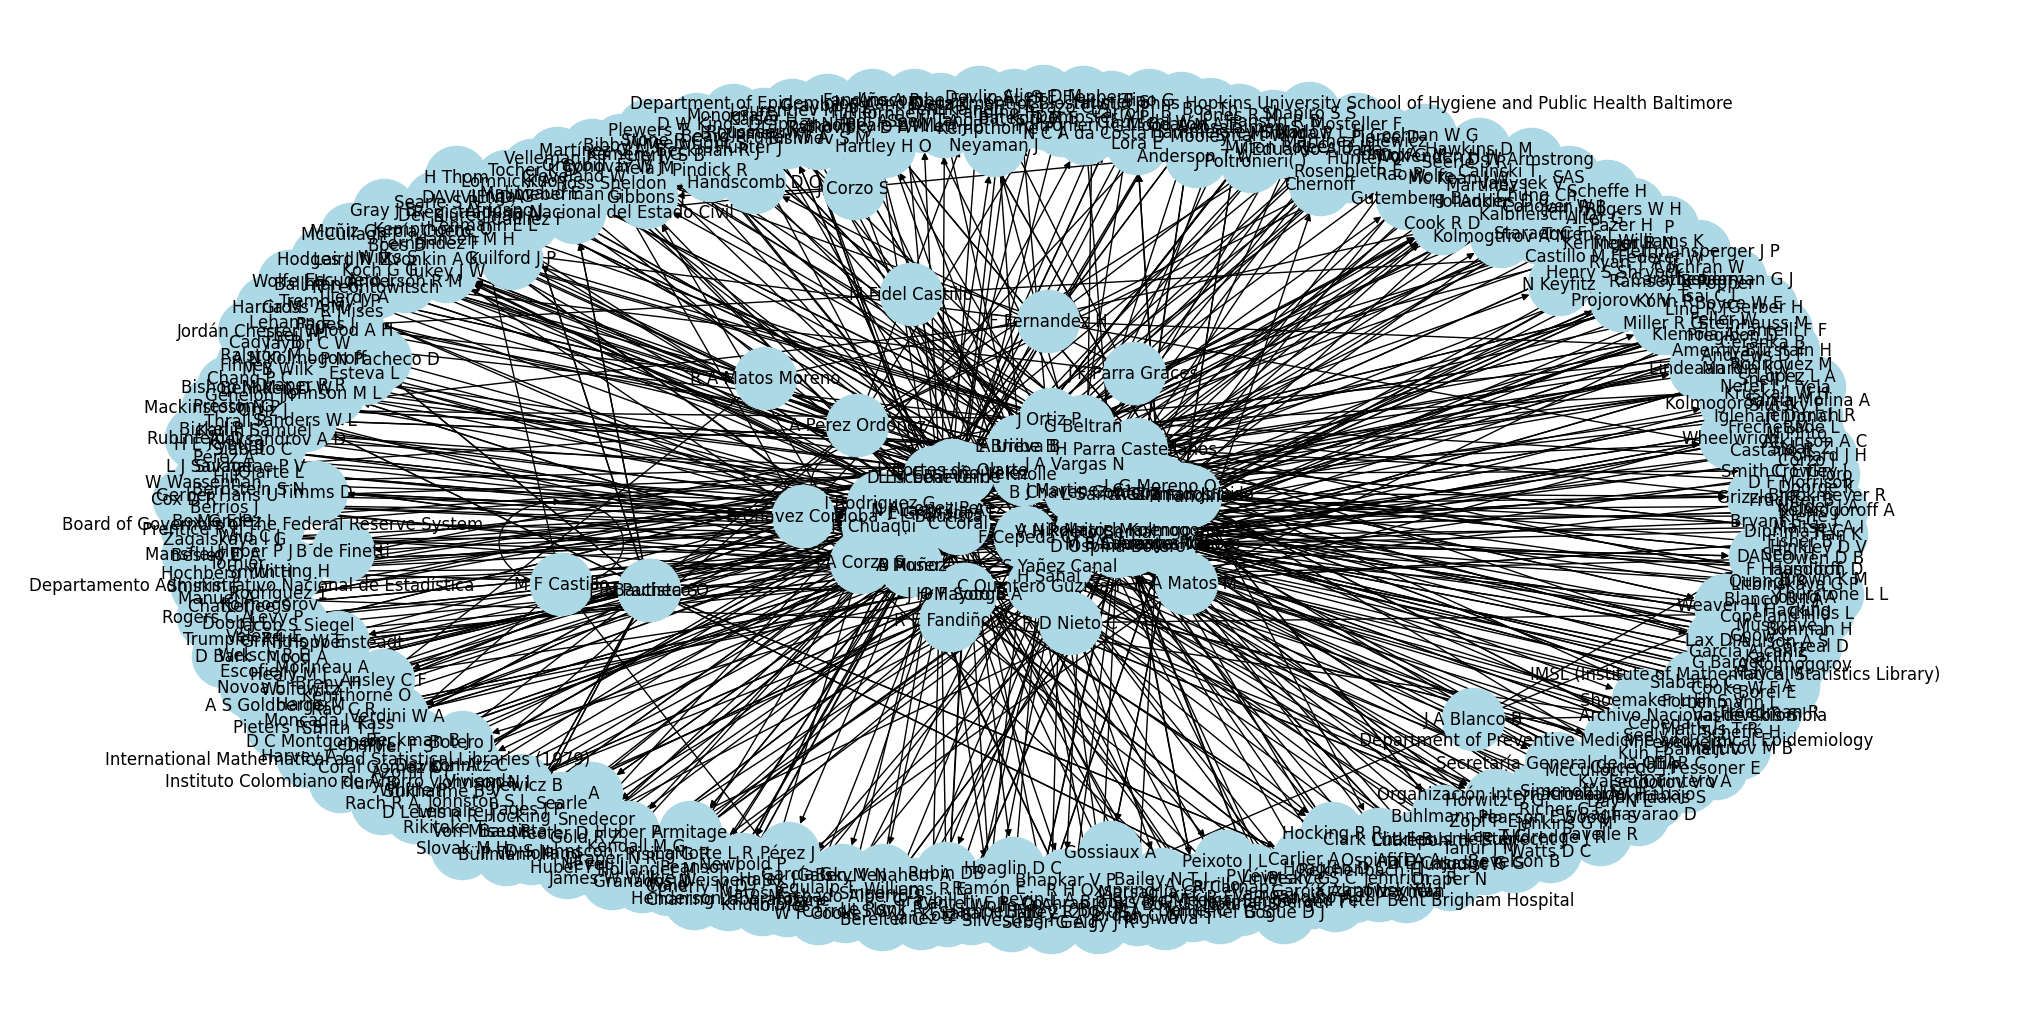

In [168]:
plt.figure(figsize=(20,10))

# Dibujar el grafo
pos = nx.spring_layout(G_80_art)
nx.draw(G_80_art, pos, with_labels=True, node_color='lightblue', node_size=2000)

# Mostrar el grafo
plt.show()

## ***Medidas descriptivas de las redes***